In [30]:
import pandas as pd
import talib
import matplotlib.pyplot as plt
import numpy as np




## Reading the data

In [31]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\AAPL_historical_data.csv')

# Ensure the required columns are present
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df = df[required_columns]

# Display the first few rows of the data
print(df.head())

         Date      Open      High       Low     Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   73449600


### Analysis Indicators

                Open      High       Low     Close     Volume  SMA100  SMA400  \
Date                                                                            
1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600     NaN     NaN   
1980-12-15  0.122210  0.122210  0.121652  0.121652  175884800     NaN     NaN   
1980-12-16  0.113281  0.113281  0.112723  0.112723  105728000     NaN     NaN   
1980-12-17  0.115513  0.116071  0.115513  0.115513   86441600     NaN     NaN   
1980-12-18  0.118862  0.119420  0.118862  0.118862   73449600     NaN     NaN   

            RSI  MACD  MACD_Signal  MACD_Hist    Return  Volatility  
Date                                                                 
1980-12-12  NaN   NaN          NaN        NaN       NaN         NaN  
1980-12-15  NaN   NaN          NaN        NaN -0.052171         NaN  
1980-12-16  NaN   NaN          NaN        NaN -0.073398         NaN  
1980-12-17  NaN   NaN          NaN        NaN  0.024751         NaN  
1980-12-18  

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_9136\3624998350.py:65: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Toshiba\Documents\Kifiya\week 1\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


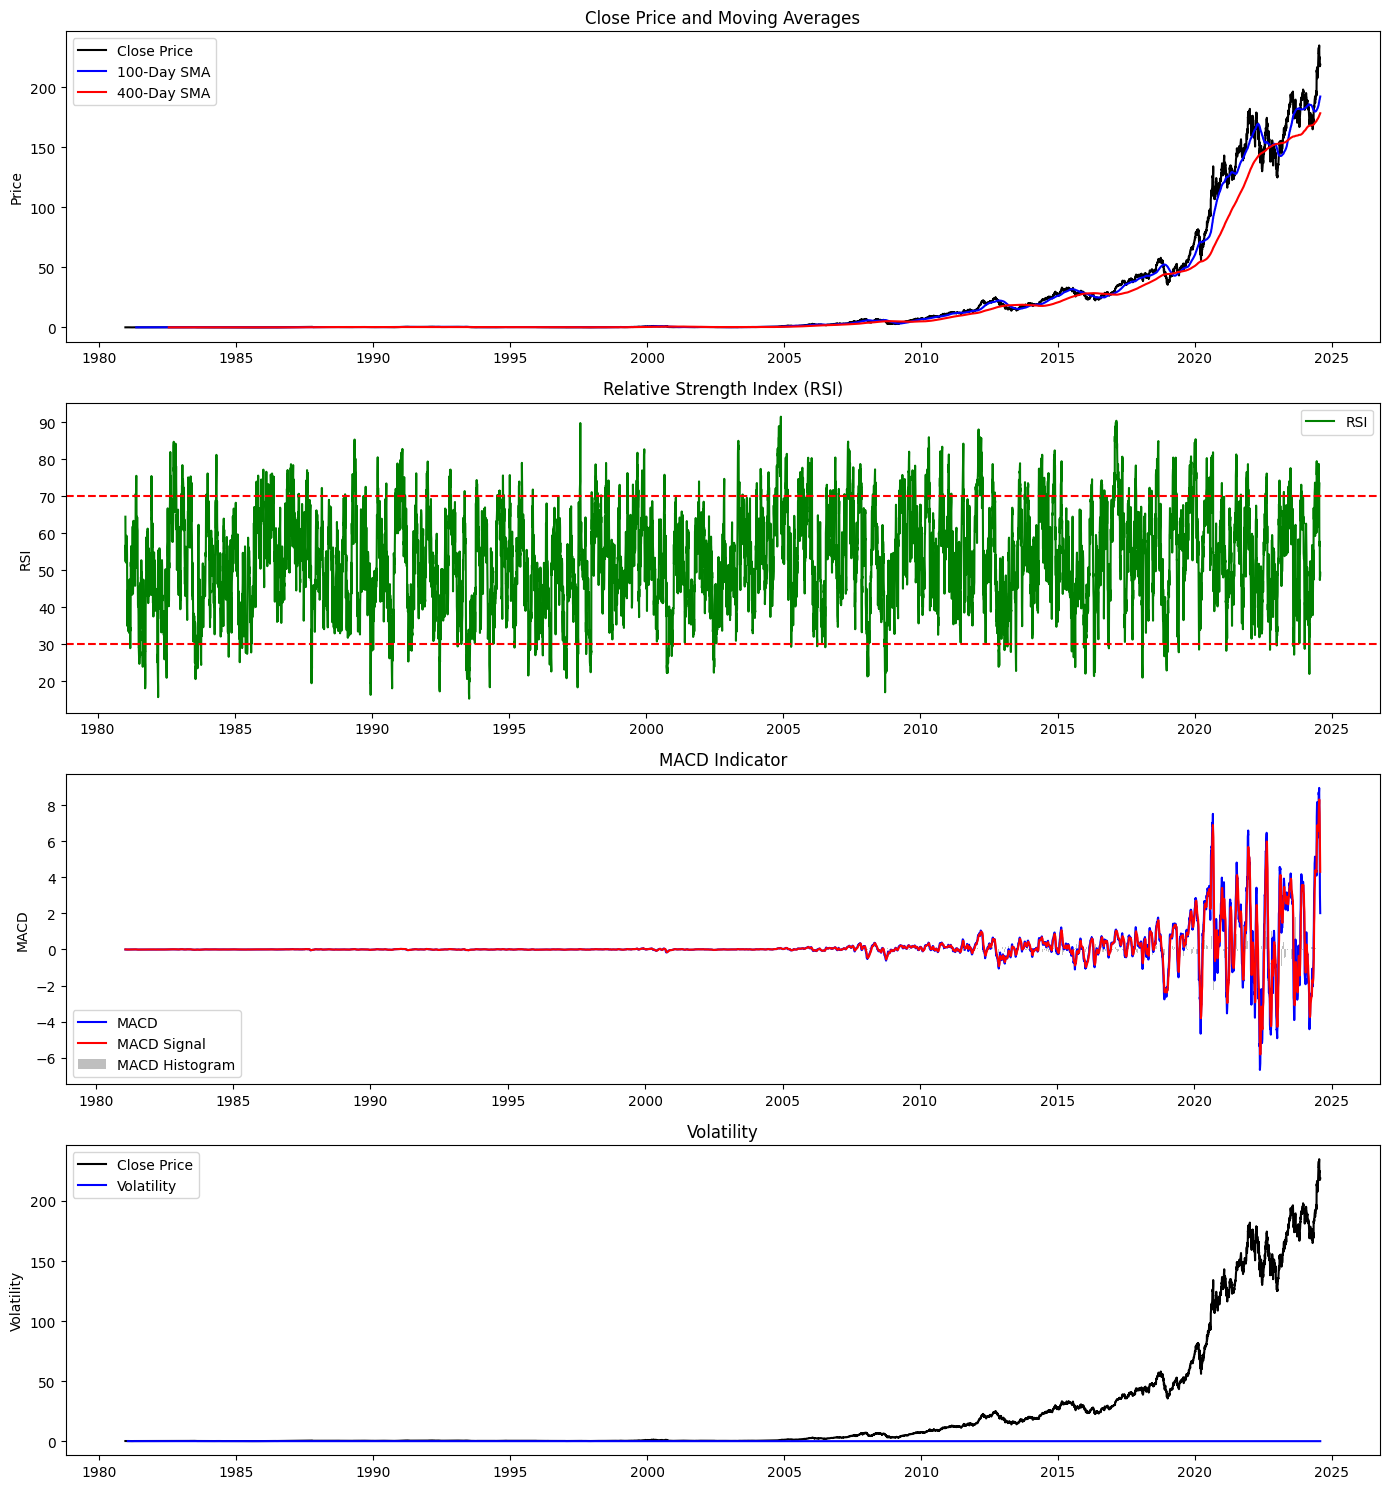

In [32]:
# Convert Date column to datetime if not already done
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate 100-day and 400-day Moving Averages
df['SMA100'] = talib.SMA(df['Close'], timeperiod=100)
df['SMA400'] = talib.SMA(df['Close'], timeperiod=400)

# Calculate RSI (Relative Strength Index)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macdsignal
df['MACD_Hist'] = macdhist

# Calculate daily returns
df['Return'] = df['Close'].pct_change()

# Calculate rolling volatility (21-day rolling standard deviation of returns)
df['Volatility'] = df['Return'].rolling(window=21).std()

# Display the DataFrame with the new indicators
print(df.head())

# Plotting
plt.figure(figsize=(14, 15))

# Plot Close Price and Moving Averages
plt.subplot(4, 1, 1)
plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(df['SMA100'], label='100-Day SMA', color='blue')
plt.plot(df['SMA400'], label='400-Day SMA', color='red')
plt.title('Close Price and Moving Averages')
plt.ylabel('Price')
plt.legend()

# Plot RSI
plt.subplot(4, 1, 2)
plt.plot(df['RSI'], label='RSI', color='green')
plt.title('Relative Strength Index (RSI)')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='red', linestyle='--')
plt.ylabel('RSI')
plt.legend()

# Plot MACD
plt.subplot(4, 1, 3)
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(df.index, df['MACD_Hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title('MACD Indicator')
plt.ylabel('MACD')
plt.legend()

# Plot Close Price and Volatility
plt.subplot(4, 1, 4)
plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(df['Volatility'], label='Volatility', color='blue')
plt.title('Volatility')
plt.ylabel('Volatility')
plt.legend()

plt.tight_layout()
plt.show()
